<img src="https://i0.wp.com/inversionisto.com/wp-content/uploads/2019/04/AC1B1546-A9B6-466E-93B0-FED2682AAD3A.jpeg?fit=1280%2C958&ssl=1" style="float:right" width="400" >

## **Modelo predictivo basado en regresión para estimar el precio de una vivienda**

### Omar Urena

### **Fase 1**: Importación del dataset.

**Configuracion Drive y Descarga del conjunto de Datos**

In [ ]:
#Configuracion
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import  GoogleCredentials

#Autenticación  y creación del cliente PyDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Crear variable con el link de donde esta almacenado el conjunto de datos
link = 'https://drive.google.com/open?id=1tD-uZw1F99uQHWFA_ZluE4N4pIl4jzHg'

#Cargar variable ID con el indendificador del documento en el link
fluff, id = link.split('=')
print(id)

1tD-uZw1F99uQHWFA_ZluE4N4pIl4jzHg


In [ ]:
#Descargar el conjunto de datos del fichero en Drive
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('data.csv')

### **Fase 2**: Análisis exploratorio de los datos.

**Libreria**

In [ ]:
#Analisis Exploratorio
import pandas as pd

In [ ]:
#Crear variable con el dataset
house_prince = pd.read_csv("./data.csv")

In [ ]:
#Explorar Dataset: visualizamos las primera filas del conjunto de datos para familiarizarnos con las informaciones alamcenadas.
house_prince.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
#Informaciones del dataset
#(Nombres de variables o columnas, cantidad de columnas (18), cantidad filas(4,600))
#(Tipo de datos (Entero, decimales y categorico o string))
#De primera manos visualizamos que no hay 4,600 Non-Null de 4,600 filas existentes.
print(house_prince.info(),f'Dimesión del dataset (Rows/Col) {house_prince.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
#En las informaciones se puede observar las variables  como 'floors', 'bedrooms', 'bathrooms' son decimales
#la convertiremos tipo entero.
house_prince[['floors', 'bedrooms', 'bathrooms']] = house_prince[['floors', 'bedrooms', 'bathrooms']].astype('int')

In [ ]:
#Revisar si existen missing values o valores perdidos
house_prince.isnull().sum().to_frame("Vacio")

,Vacio
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
#Principales estadisticas descriptivas del dataset para las variables numericas
house_prince.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,1.788913,0.752185,0.0,1.00,2.000000,2.00,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.459130,0.552194,1.0,1.00,1.000000,2.00,3.0
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


En las estdisticas observamos comportamientos anormales de los datos como es el caso del precio donde el valor minimo es cero, de la misma manera en las habitaciones y baños, etc..., esta parte hay que tomarla en cuenta posteriormente para el reprocesamiento de los datos.

In [ ]:
#Principales estadisticas descriptivas del dataset para las variables categoricas
house_prince.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
date,4600,70,2014-06-23 00:00:00,142
street,4600,4525,2520 Mulberry Walk NE,4
city,4600,44,Seattle,1573
statezip,4600,77,WA 98103,148
country,4600,1,USA,4600


En las informaciones estadisticas de las variables categoricas podemos determinar el tratamiento o uso para nuestro modelo, por lo tanto hay mucha redundancia en estas variables no seran muy util por el tipo de caso, ya que pais es unico USA, codigo postal, ciudad, calle son redundante sin embargo puede ser util solo usar una en caso de ser necesario agregar valor.

**Visualización de los Datos**

In [ ]:
#Librerias
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

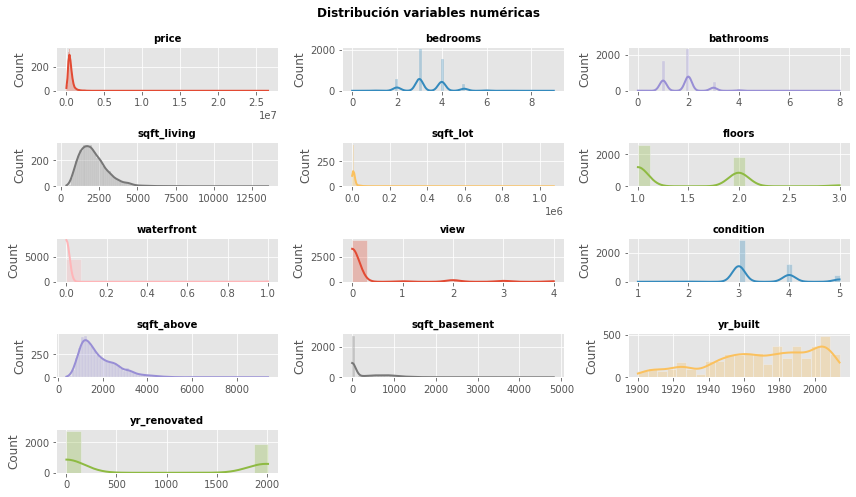

In [ ]:
#@title
#histogramas
#Gráfico para cada variables numericas

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = house_prince.select_dtypes(include=['int64', 'float64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = house_prince,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [13,14]:
    fig.delaxes(axes[i])


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 12, fontweight = "bold");

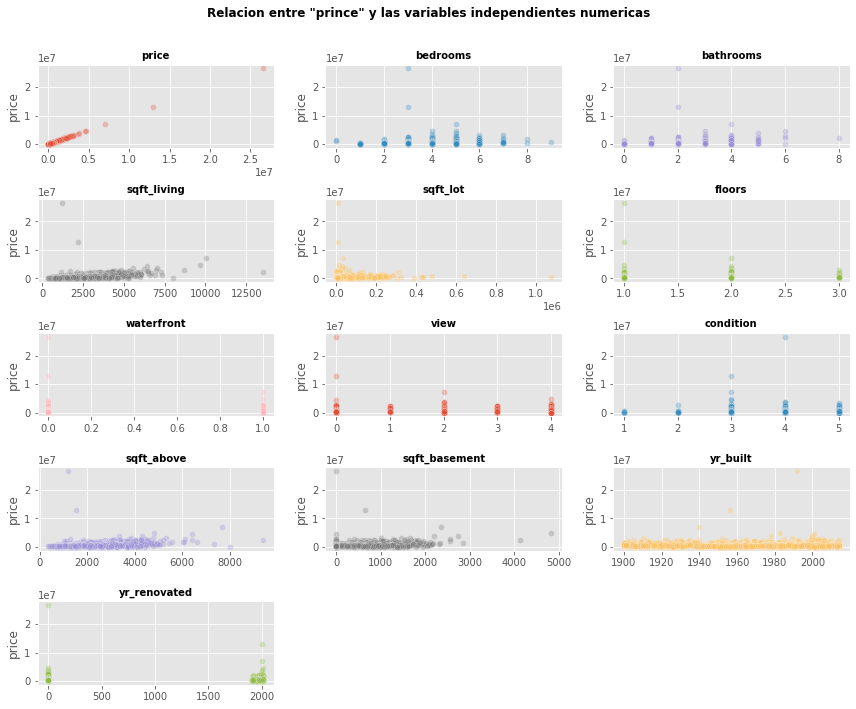

In [ ]:
#@title
#scatter

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 10))
axes = axes.flat
columnas_ = house_prince.select_dtypes(include=['int64', 'float64']).columns

for i, colum in enumerate(columnas_):
    sns.scatterplot(
        data    = house_prince,
        x       = colum,
        y       = 'price',
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        alpha   = 0.3,
        ax      = axes[i]
        )

    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [13,14]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Relacion entre "prince" y las variables independientes numericas', fontsize = 12, fontweight = "bold");

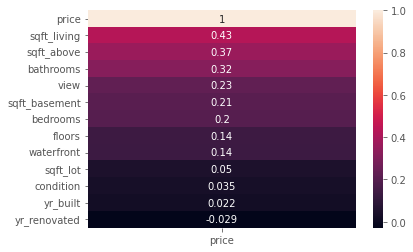

In [ ]:
#Observamos el nivel de correlacion de todas las variables independientes con respectos 'price' la dependiente
sns.heatmap(house_prince.corr()[['price']].sort_values(by='price', ascending=False), annot = True)
plt.show()

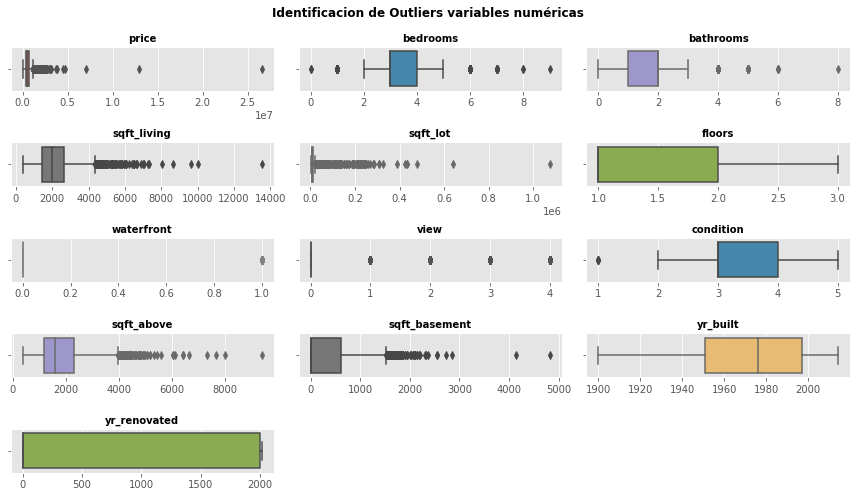

In [ ]:
#@title
#BoxPlots
#Gráfico para cada variables numericas

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = house_prince.select_dtypes(include=['int64', 'float64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        data    = house_prince,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [13,14]:
    fig.delaxes(axes[i])


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Identificacion de Outliers variables numéricas', fontsize = 12, fontweight = "bold");

Los boxplots reflejan un conjunto de datos con muchos valores outliers y una distribucion anormal de los datos, por lo tanto sera necesario normalizarla y eliminar esos valor extremos para entrenar un modelo mas preciso.

**Hipotesis 1:** solo utilizando las variables numericas

### **Fase 3:** Fase de entrenamiento.

In [ ]:
#Nombre de las columnas
house_prince.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
#identificamos las variables categoricas y la sacamos del dataset
variables_cat = house_prince.select_dtypes('object').columns

#eliminamos las variables categoricas
df_h1 = house_prince.drop(variables_cat, axis = 1)

df_h1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005
1,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0
2,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0
3,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0
4,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992


In [ ]:
#selecionamos nuestra variable dependiente y las independientes

h1_x = df_h1.drop('price', axis = 1)
h1_y = df_h1['price']

In [ ]:
#Preparamos nuestro set de entrenamiento y prueba
#Libreria
from sklearn.model_selection import train_test_split

#Separamos en train y test
h1_xtrain, h1_xtest, h1_ytrain, h1_ytest = train_test_split(h1_x, h1_y, test_size= 0.20, random_state=43)

In [ ]:
#importamos el modelo de regresion Linear
from sklearn.linear_model import LinearRegression

#Modelo1
model1 = LinearRegression()

#Entrenamiento
model1.fit(h1_xtrain, h1_ytrain)

LinearRegression()

### **Fase 4:** Evaluación y análisis de los resultados.

In [ ]:
#Importamos la metrica de validacion (MSE) Error Cuadratico Medio
from sklearn.metrics import mean_squared_error

In [ ]:
#Predicion de y_train con los datos usado en el entrenamiento
pred_h1_train = model1.predict(h1_xtrain)

#Calculamos el MSE
h1_mse_train = mean_squared_error(y_true = h1_ytrain, y_pred = pred_h1_train)
print(f'Error cuadratico Medio Train_h1: {h1_mse_train:,.2f}')

#Predicion de y_test con los datos usado en el entrenamiento
pred_h1_test = model1.predict(h1_xtest)

#Calculamos el MSE
h1_mse_test = mean_squared_error(y_true = h1_ytest, y_pred = pred_h1_test)
print(f'Error cuadratico Medio Test_h1: {h1_mse_test:,.2f}')

accuracy = model1.score(h1_xtrain, h1_ytrain)
print(f"Model Accuracy:  {accuracy:.2f}")

Error cuadratico Medio Train_h1: 292,362,391,426.87
Error cuadratico Medio Test_h1: 75,194,221,478.41
Model Accuracy:  0.18


**Hipotesis 2**: Haremos una selecion de las variables mas significativas con relacion a 'price' de acuerdo al analisis de correlacion, eliminaremos los outliers observados en  los boxplots y eliminaremos los valores en ceros observados en estadisticas para price, bathrooms y bedrooms que no deberian ser.

In [ ]:
#selecionaremos las varibles > 0.2
house_prince.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.430410
sqft_above,0.367570
bathrooms,0.317229
view,0.228504
sqft_basement,0.210427
bedrooms,0.200336
floors,0.137125
waterfront,0.135648
sqft_lot,0.050451


### **Fase 3:** Fase de entrenamiento.

In [ ]:
#identificamos las variables mas significativas > 0.2 el nivel de correlacion
df_h2 = house_prince[['price','sqft_living', 'sqft_above', 'bathrooms', 'view','sqft_basement','bedrooms']]

df_h2.head(5)

,price,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms
0,313000.0,1340,1340,1,0,0,3
1,2384000.0,3650,3370,2,4,280,5
2,342000.0,1930,1930,2,0,0,3
3,420000.0,2000,1000,2,0,1000,3
4,550000.0,1940,1140,2,0,800,4


In [ ]:
#eliminaremos los valores en ceros en price, bathrooms y bedrooms

df_h2.drop(df_h2[df_h2['price'] == 0].index, inplace = True)
df_h2.drop(df_h2[df_h2['bedrooms'] == 0].index, inplace = True)
df_h2.drop(df_h2[df_h2['bathrooms'] == 0].index, inplace = True)

df_h2[df_h2==0].count()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


price               0
sqft_living         0
sqft_above          0
bathrooms           0
view             4087
sqft_basement    2702
bedrooms            0
dtype: int64

In [ ]:
#Remover los outliers sqft_basement
import numpy as np

Q3 = np.quantile(df_h2['sqft_basement'], 0.75)
Q1 = np.quantile(df_h2['sqft_basement'], 0.25)
IQR = Q3 - Q1

lower_sqft_basement = Q1 - 1.5 * IQR
upper_sqft_basement = Q3 + 1.5 * IQR

df_h2s = df_h2[(df_h2.sqft_basement > lower_sqft_basement) & (df_h2.sqft_basement < upper_sqft_basement)]

In [ ]:
#Remover los outliers sqft_above
import numpy as np

Q3 = np.quantile(df_h2s['sqft_above'], 0.75)
Q1 = np.quantile(df_h2s['sqft_above'], 0.25)
IQR = Q3 - Q1

lower_sqft_above = Q1 - 1.5 * IQR
upper_sqft_above = Q3 + 1.5 * IQR

df_h2a = df_h2s[(df_h2s.sqft_above > lower_sqft_above) & (df_h2s.sqft_above < upper_sqft_above)]

In [ ]:
#Remover los outliers sqft_living
import numpy as np

Q3 = np.quantile(df_h2a['sqft_living'], 0.75)
Q1 = np.quantile(df_h2a['sqft_living'], 0.25)
IQR = Q3 - Q1

lower_sqft_living = Q1 - 1.5 * IQR
upper_sqft_living = Q3 + 1.5 * IQR

df_h2l = df_h2a[(df_h2a.sqft_living > lower_sqft_living) & (df_h2a.sqft_living < upper_sqft_living)]

In [ ]:
#Remover los outliers price
import numpy as np

Q3 = np.quantile(df_h2l['price'], 0.75)
Q1 = np.quantile(df_h2l['price'], 0.25)
IQR = Q3 - Q1

lower_price = Q1 - 1.5 * IQR
upper_price = Q3 + 1.5 * IQR

df_h2p = df_h2l[(df_h2l.price > lower_price) & (df_h2l.price < upper_price)]

In [ ]:
#Remover los outliers bedrooms
import numpy as np

Q3 = np.quantile(df_h2p['bedrooms'], 0.75)
Q1 = np.quantile(df_h2p['bedrooms'], 0.25)
IQR = Q3 - Q1

lower_bedrooms = Q1 - 1.5 * IQR
upper_bedrooms = Q3 + 1.5 * IQR

df_h2b = df_h2p[(df_h2p.bedrooms > lower_bedrooms) & (df_h2p.bedrooms < upper_bedrooms)]

In [ ]:
#Remover los outliers bathrooms
import numpy as np

Q3 = np.quantile(df_h2b['bathrooms'], 0.75)
Q1 = np.quantile(df_h2b['bathrooms'], 0.25)
IQR = Q3 - Q1

lower_bathrooms = Q1 - 1.5 * IQR
upper_bathrooms = Q3 + 1.5 * IQR

df_h2_final = df_h2b[(df_h2b.bathrooms > lower_bathrooms) & (df_h2b.bathrooms < upper_bathrooms)]

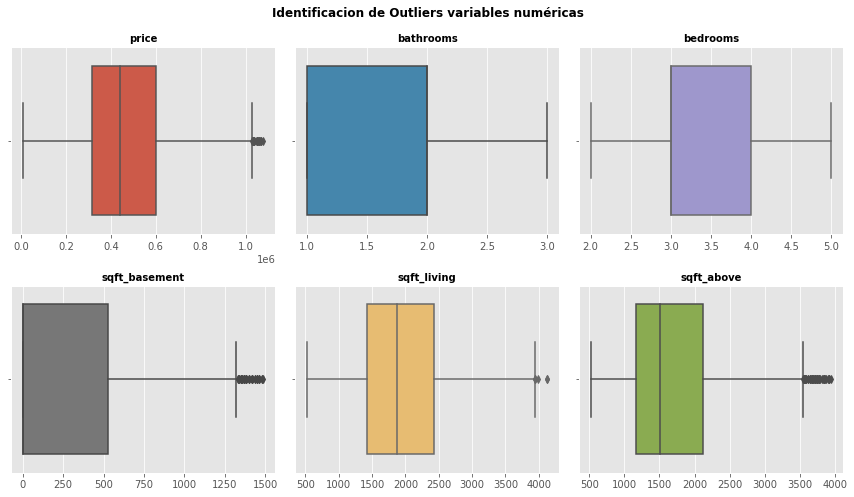

In [ ]:
#@title

#BoxPlots
#Gráfico para cada variables numericas

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = df_h2_final[['price', 'bathrooms','bedrooms', 'sqft_basement','sqft_living','sqft_above']].columns

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        data    = df_h2_final,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")



fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Identificacion de Outliers variables numéricas', fontsize = 12, fontweight = "bold");

In [ ]:
#selecionamos nuestra variable dependiente y las independientes

h2_x = df_h2_final.drop('price', axis = 1)
h2_y = df_h2_final['price']

In [ ]:
#Preparamos nuestro set de entrenamiento y prueba

h2_xtrain, h2_xtest, h2_ytrain, h2_ytest = train_test_split(h2_x, h2_y, test_size= 0.20, random_state=43)

In [ ]:
#Modelo2
model2 = LinearRegression()

#Entrenamiento
model2.fit(h2_xtrain, h2_ytrain)

LinearRegression()

### **Fase 4:** Evaluación y análisis de los resultados.

In [ ]:
#Predicion de y_train con los datos usado en el entrenamiento
pred_h2_train = model2.predict(h2_xtrain)

#Calculamos el MSE
h2_mse_train = mean_squared_error(y_true = h2_ytrain, y_pred = pred_h2_train)
print(f'Error cuadratico Medio Train_h2: {h2_mse_train:,.2f}')
print(f'Error cuadratico Medio Train_h1: {h1_mse_train:,.2f}')

print('')

#Predicion de y_test con los datos usado en el entrenamiento
pred_h2_test = model2.predict(h2_xtest)

#Calculamos el MSE
h2_mse_test = mean_squared_error(y_true = h2_ytest, y_pred = pred_h2_test)
print(f'Error cuadratico Medio Test_h2: {h2_mse_test:,.2f}')
print(f'Error cuadratico Medio Test_h1: {h1_mse_test:,.2f}')

print('')

accuracy2 = model2.score(h2_xtrain, h2_ytrain)
print(f"Model Accuracy2:  {accuracy2:.2f}")

accuracy1 = model1.score(h1_xtrain, h1_ytrain)
print(f"Model Accuracy1:  {accuracy1:.2f}")



Error cuadratico Medio Train_h2: 24,667,989,407.62
Error cuadratico Medio Train_h1: 292,362,391,426.87

Error cuadratico Medio Test_h2: 24,468,361,277.21
Error cuadratico Medio Test_h1: 75,194,221,478.41

Model Accuracy2:  0.38
Model Accuracy1:  0.18


**Hipotesis 3**: Como ultimo escenario utilizaremos la tecnica de escalado de los datos  y agregaremos la variable city con una transformacion hot_encoding ya que la misma es categorica en addicion a las tecnicas utilizadas anteriormente.

### **Fase 3:** Fase de entrenamiento.

In [ ]:
#hacemos la transformacion hot_encoding de la variable ciudad
ciudad = pd.get_dummies(house_prince['city'])

#La agregamos al dataset final, el cual ultilizamos en la ultima hipotesis y eliminamos N/A de las filas eliminada por valores ceros
df = pd.concat([df_h2_final,ciudad],axis = 1)
df = df.dropna()
df.head(5)

,price,sqft_living,sqft_above,bathrooms,view,sqft_basement,bedrooms,Algona,Auburn,Beaux Arts Village,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,313000.0,1340.0,1340.0,1.0,0.0,0.0,3.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,342000.0,1930.0,1930.0,2.0,0.0,0.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,2000.0,1000.0,2.0,0.0,1000.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,1940.0,1140.0,2.0,0.0,800.0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,490000.0,880.0,880.0,1.0,0.0,0.0,2.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
#selecionamos nuestra variable dependiente y las independientes

h3_x = df.drop('price', axis = 1)
h3_y = df['price']

In [ ]:
#Importamos la tecnica a utilizar para escalar la variable
from sklearn.preprocessing import StandardScaler, scale
scaler = StandardScaler()

#Pasamos la serie a un array de numpy ya que esta tecnica esta optimizada para trabajar con matrices
h3_y = scaler.fit_transform(h3_y.to_numpy().reshape(-1,1))

#Luego de escalar, volvemos a convertir el array en 1xn
h3_y = h3_y.reshape(1,-1)[0]

In [ ]:
#Preparamos nuestro set de entrenamiento y prueba

h3_xtrain, h3_xtest, h3_ytrain, h3_ytest = train_test_split(h3_x, h3_y, test_size= 0.20, random_state=43)

In [ ]:
#Modelo3
model3 = LinearRegression()

#Entrenamiento
model3.fit(h3_xtrain, h3_ytrain)

LinearRegression()

### **Fase 4:** Evaluación y análisis de los resultados.

In [ ]:
#Predicion de y_train con los datos usado en el entrenamiento
pred_h3_train = model3.predict(h3_xtrain)

print('Resultados del MSE: ')

#Calculamos el MSE
h3_mse_train = mean_squared_error(y_true = h3_ytrain, y_pred = pred_h3_train)
print(f'Error cuadratico Medio Train_h3: {h3_mse_train:,.2f}')
print(f'Error cuadratico Medio Train_h2: {h2_mse_train:,.2f}')
print(f'Error cuadratico Medio Train_h1: {h1_mse_train:,.2f}')

print('')

#Predicion de y_test con los datos usado en el entrenamiento
pred_h3_test = model3.predict(h3_xtest)

#Calculamos el MSE
h3_mse_test = mean_squared_error(y_true = h3_ytest, y_pred = pred_h3_test)
print(f'Error cuadratico Medio Test_h3: {h3_mse_test:,.2f}')
print(f'Error cuadratico Medio Test_h2: {h2_mse_test:,.2f}')
print(f'Error cuadratico Medio Test_h1: {h1_mse_test:,.2f}')

print('')

accuracy3 = model3.score(h3_xtrain, h3_ytrain)
print(f"Model Accuracy3:  {accuracy3:.2f}")

accuracy2 = model2.score(h2_xtrain, h2_ytrain)
print(f"Model Accuracy2:  {accuracy2:.2f}")

accuracy1 = model1.score(h1_xtrain, h1_ytrain)
print(f"Model Accuracy1:  {accuracy1:.2f}")



Resultados del MSE: 
Error cuadratico Medio Train_h3: 0.31
Error cuadratico Medio Train_h2: 24,667,989,407.62
Error cuadratico Medio Train_h1: 292,362,391,426.87

Error cuadratico Medio Test_h3: 0.34
Error cuadratico Medio Test_h2: 24,468,361,277.21
Error cuadratico Medio Test_h1: 75,194,221,478.41

Model Accuracy3:  0.68
Model Accuracy2:  0.38
Model Accuracy1:  0.18


### **Conclusiones**

Hemos llevado a cabo una serie de hipotesis donde hemos utilizmos varias tecnicas de reprocesamientos del conjunto de datos para optimizar el modelo y obtener un resultado adecuado a la metrica de evaluacion que utilizamos, en este caso MSE Error Cuadratico Medio que indica lo seguiente:

Es la media de las diferencias cuadradas entre los
valores observados y los predichos, por lo tanto entre mas cercano a Cero (0.0) mucho mejor es muestro modelo a la hora de predecir.

En vista a los 3 resultamos obtenidos, concluimos que la hipotesis 3 es la aceptada luego de agregar la normalizacion de las variables objetivo y agregar la variable categorica 'city' a traves de la tecnica hot encoding que resulto ser muy significativa en la ciudad que esta ubicada la vivienda a la hora de determinarse su precio, asi como tambien en adicion a las demas tecnicas.